<a href="https://colab.research.google.com/github/rjhalliday/python-examples/blob/main/scikit_make_classification_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn make_classification examples

This notebook explores the use of make_classification from scikit-learn

The make_classification function in scikit-learn is used to generate synthetic datasets for classification tasks. It's particularly useful for creating data that can be used to test and evaluate machine learning algorithms.

make_classification takes several parameters:
* **n_samples**: The number of samples in the output data set
* **n_features**: The total number of features for each sample. This includes informative, redundant, and irrelevant features. Only informative and redundant features are specified, with irrelevant features making up the balance to equal the number of features in total (n_fatures). Features are the inputs for a machine learning (ML) model.
* **n_classes**: The total number of categories for the Machine Learning (ML) target variable.
* n_informative: The number of informative features. Informative features are features that have a relationship to the target.
* **n_redundant**: The number of redundant features
* **class_sep**: Controls if the classes overlap or not
* n_clusters_per_class
* random_state

Features shape: (200, 2)
Labels shape: (200,)


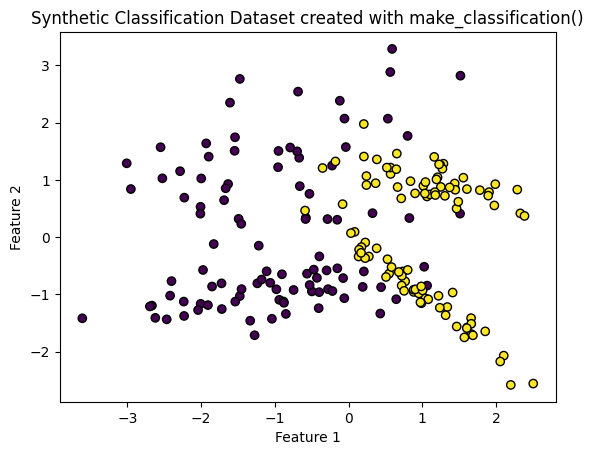

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset
#X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X, y = make_classification(n_samples = 200
                           ,n_features = 2
                           ,n_informative = 2
                           ,n_redundant = 0
                           ,n_clusters_per_class = 2
                           ,flip_y = 0
                           ,class_sep = 1
                           ,random_state = 40
                           )
# Print the shape of the dataset
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Optional: Plot the first two features for visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset created with make_classification()')
plt.show()
